In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset_train=pd.read_csv("Wine.csv")
dataset_train.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
dataset_train.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


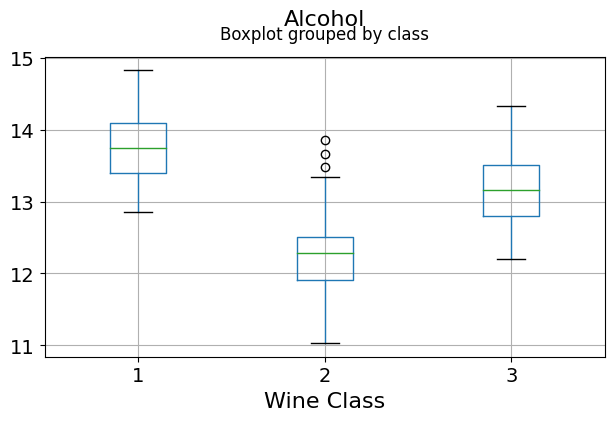

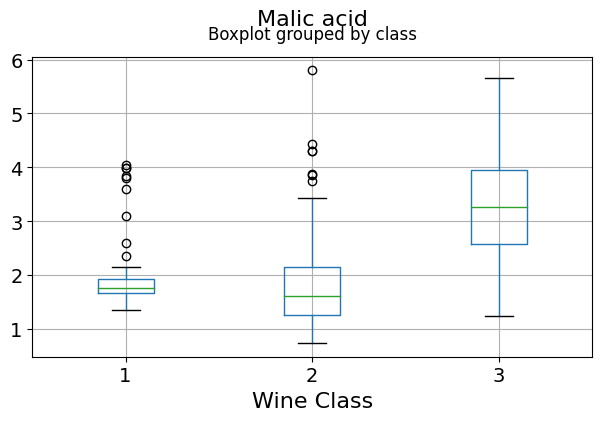

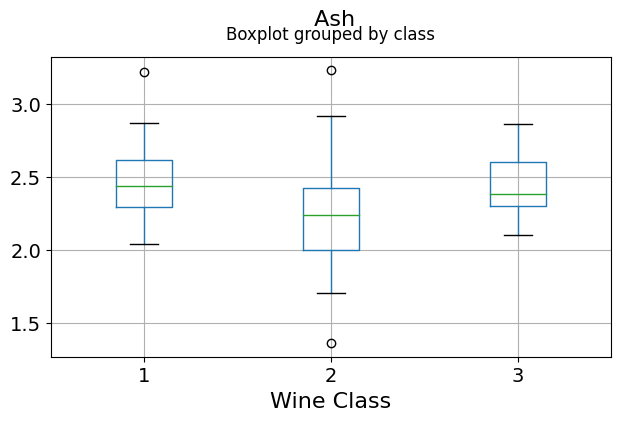

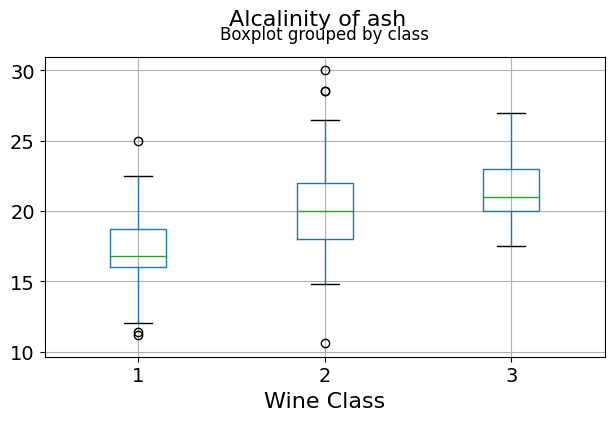

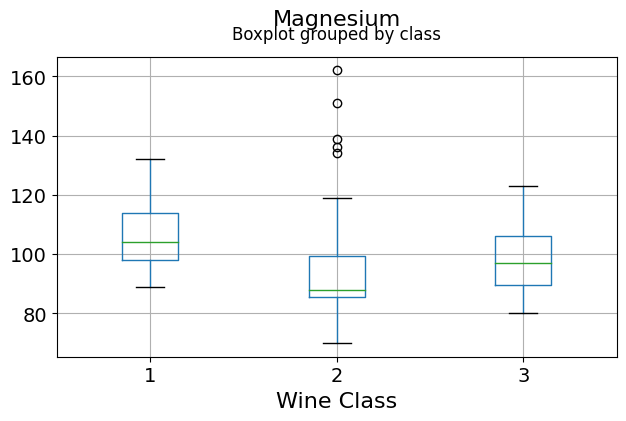

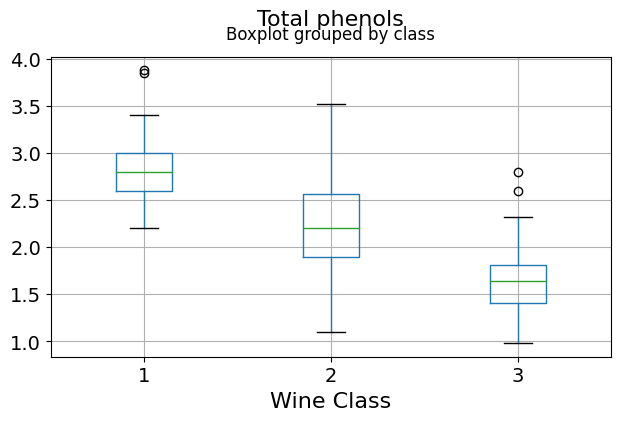

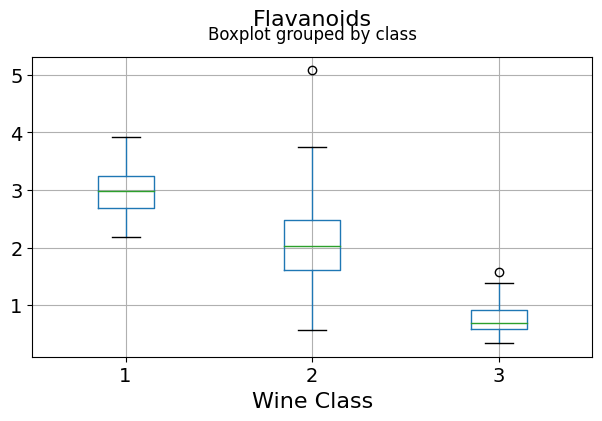

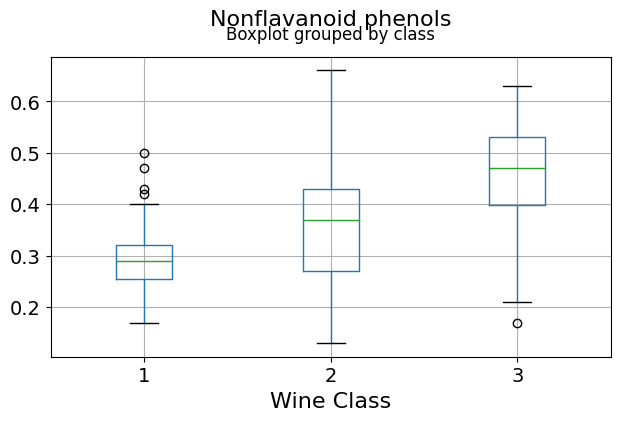

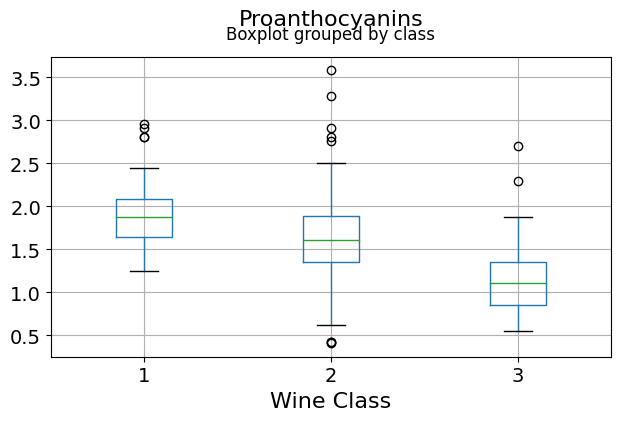

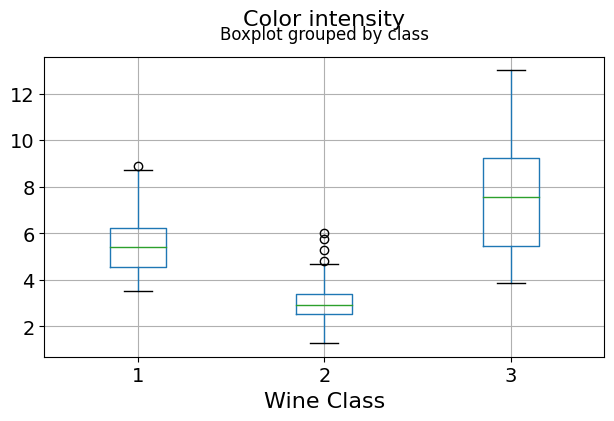

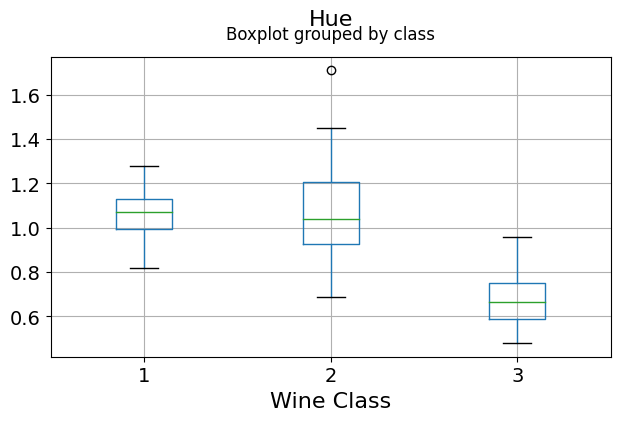

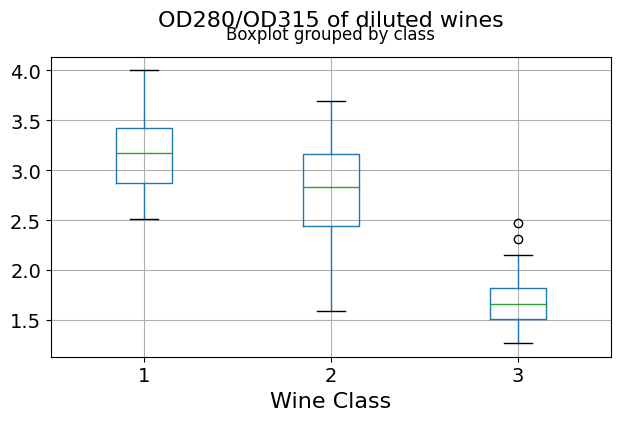

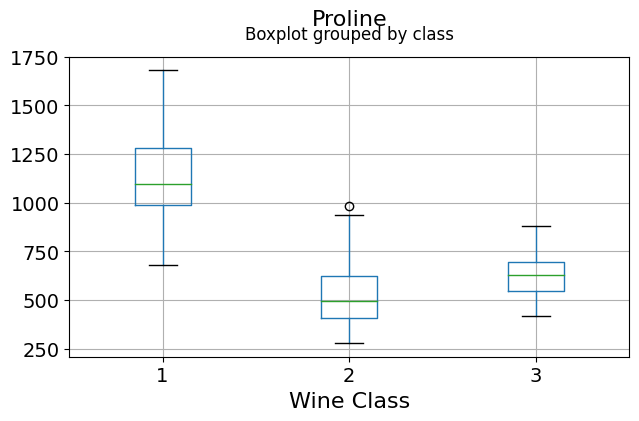

In [5]:
for c in dataset_train.columns[1:]:
    dataset_train.boxplot(c,by='class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class",fontsize=16)

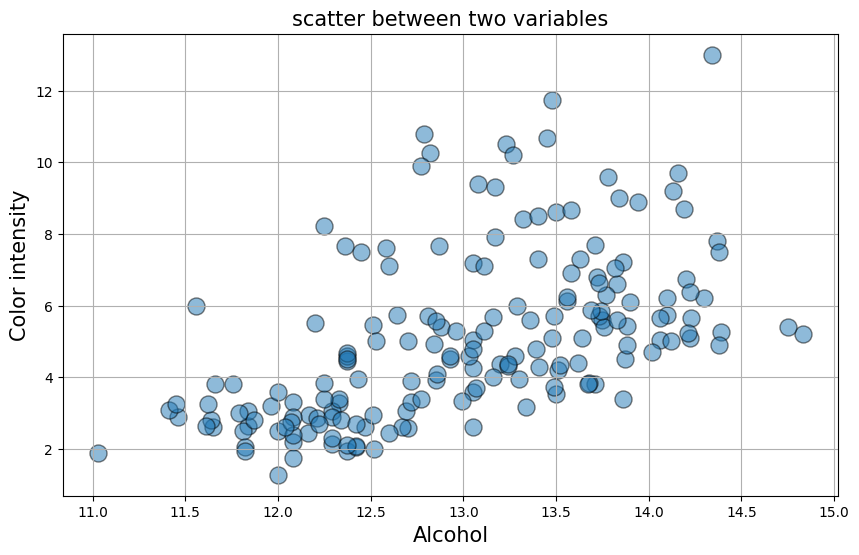

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(dataset_train['Alcohol'],dataset_train['Color intensity'],s=150,edgecolors='k',alpha=0.5)
plt.grid(True)
plt.title("scatter between two variables",fontsize=15)
plt.xlabel("Alcohol",fontsize=15)
plt.ylabel("Color intensity",fontsize=15)
plt.show()

Figure(1600x1200)
[[ 1.         -0.32822194  0.4377762  -0.04964322  0.51785911 -0.20917939
  -0.71916334 -0.84749754  0.48910916 -0.49912982  0.26566757 -0.61736921
  -0.78822959 -0.63371678]
 [-0.32822194  1.          0.09439694  0.2115446  -0.31023514  0.27079823
   0.28910112  0.23681493 -0.15592947  0.13669791  0.5463642  -0.0717472
   0.07234319  0.64372004]
 [ 0.4377762   0.09439694  1.          0.16404547  0.2885004  -0.0545751
  -0.335167   -0.41100659  0.29297713 -0.22074619  0.24898534 -0.56129569
  -0.36871043 -0.19201056]
 [-0.04964322  0.2115446   0.16404547  1.          0.44336719  0.28658669
   0.12897954  0.11507728  0.18623045  0.00965194  0.25888726 -0.07466689
   0.00391123  0.22362626]
 [ 0.51785911 -0.31023514  0.2885004   0.44336719  1.         -0.08333309
  -0.32111332 -0.35136986  0.36192172 -0.19732684  0.01873198 -0.27395522
  -0.27676855 -0.44059693]
 [-0.20917939  0.27079823 -0.0545751   0.28658669 -0.08333309  1.
   0.21440123  0.19578377 -0.25629405  0.23

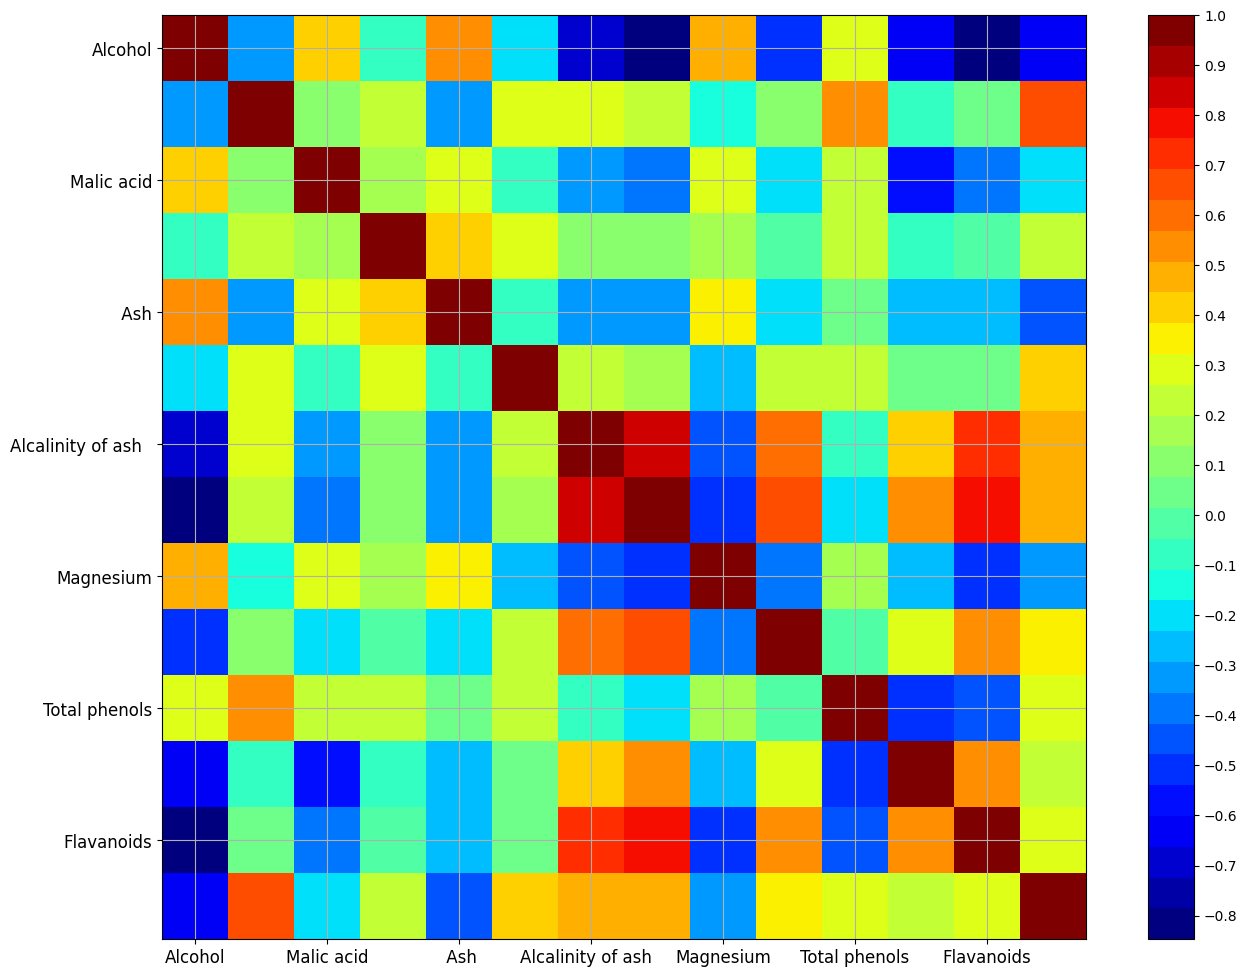

In [13]:
fig=plt.figure(figsize=(16,12))
print(fig)
cmap=cm.get_cmap('jet',30)
print(np.matrix(dataset_train.corr()))
cax=ax1.imshow(dataset_train.corr(),interpolation='nearest',cmap=cmap)
ax1.grid(True)
labels=dataset_train.columns
ax1.set_xticklabels(labels,fontsize=12)
ax1.set_yticklabels(labels,fontsize=12)
fig.colorbar(cax,ticks=[0.1*i for i in range(-11,11)])
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
X=dataset_train.drop('class',axis=1)
Y=dataset_train['class']

In [10]:
X=scaler.fit_transform(X)

In [11]:
dfx=pd.DataFrame(data=X,columns=dataset_train.columns[1:])

In [12]:
dfx.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [13]:
from sklearn.decomposition import PCA

In [14]:
pca=PCA(n_components=None)

In [15]:
dfx_pca=pca.fit(dfx)

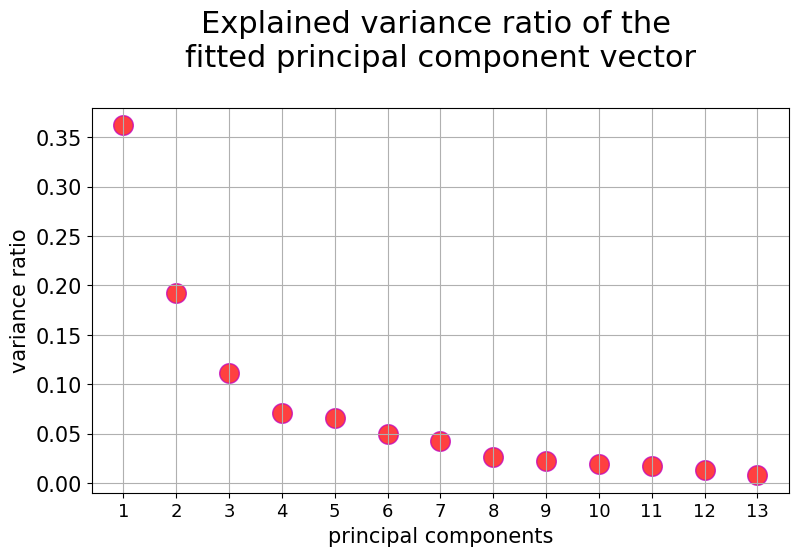

In [16]:
plt.figure(figsize=(9,5))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
           y=dfx_pca.explained_variance_ratio_,
           s=200,alpha=0.75,c='red',edgecolor='m')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=22)
plt.xlabel("principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=13)
plt.yticks(fontsize=15)
plt.ylabel("variance ratio",fontsize=15)
plt.show()

In [17]:
dfx_trans=pca.transform(dfx)

In [18]:
dfx_trans=pd.DataFrame(dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,-0.101996,0.405585,-0.379433,0.145155
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1.016563,-0.442433,0.141230,-0.271778
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,0.735600,0.293555,0.379663,-0.110164
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,0.179420,0.012478,0.550327,-0.042455


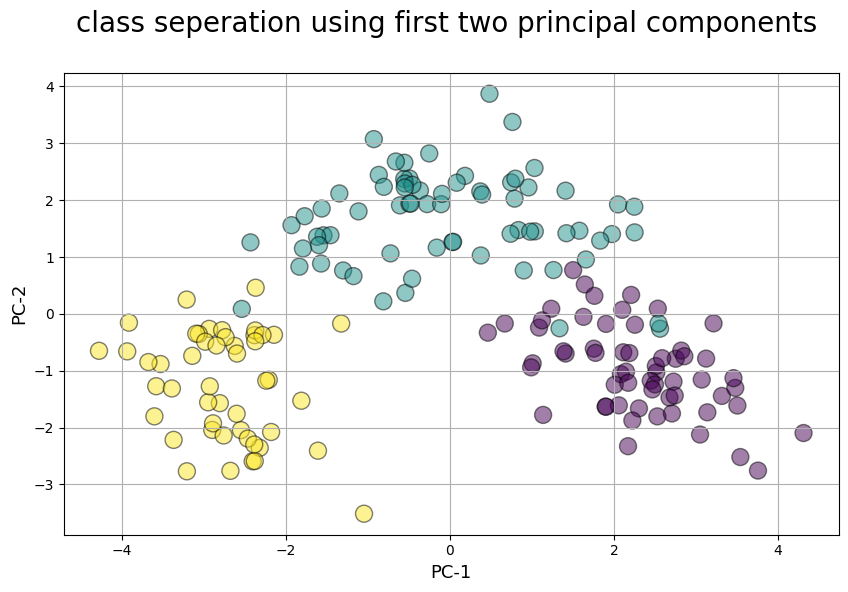

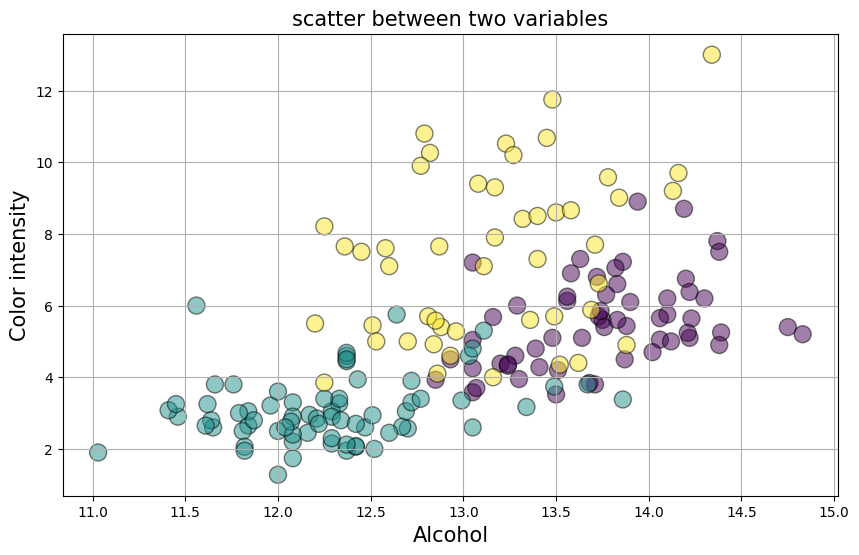

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=dataset_train['class'],edgecolors='k',alpha=0.5,s=150)
plt.grid(True)
plt.title("class seperation using first two principal components \n",fontsize=20)
plt.xlabel("PC-1",fontsize=13)
plt.ylabel("PC-2",fontsize=13)
plt.show()
plt.figure(figsize=(10,6))
plt.scatter(dataset_train['Alcohol'],dataset_train['Color intensity'],c=dataset_train['class'],s=150,edgecolors='k',alpha=0.5)
plt.grid(True)
plt.title("scatter between two variables",fontsize=15)
plt.xlabel("Alcohol",fontsize=15)
plt.ylabel("Color intensity",fontsize=15)
plt.show()

In [20]:
test=dataset_train.sample(10)
print(test)

     class  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium   
4        1    13.24        2.59  2.87                 21.0        118  \
102      2    12.34        2.45  2.46                 21.0         98   
165      3    13.73        4.36  2.26                 22.5         88   
110      2    11.46        3.74  1.82                 19.5        107   
95       2    12.47        1.52  2.20                 19.0        162   
122      2    12.42        4.43  2.73                 26.5        102   
55       1    13.56        1.73  2.46                 20.5        116   
83       2    13.05        3.86  2.32                 22.5         85   
115      2    11.03        1.51  2.20                 21.5         85   
69       2    12.21        1.19  1.75                 16.8        151   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins   
4             2.80        2.69                  0.39             1.82  \
102           2.56        2.11                  0.

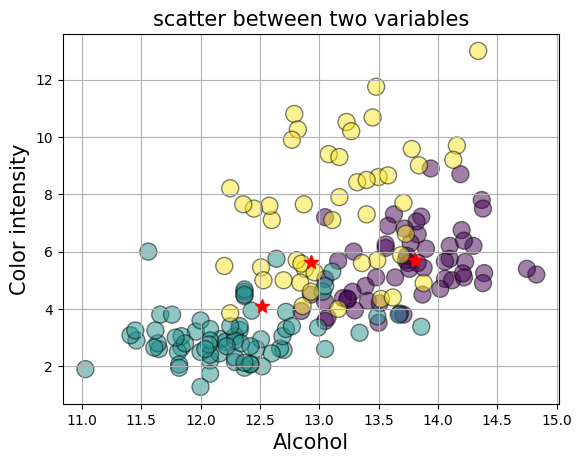

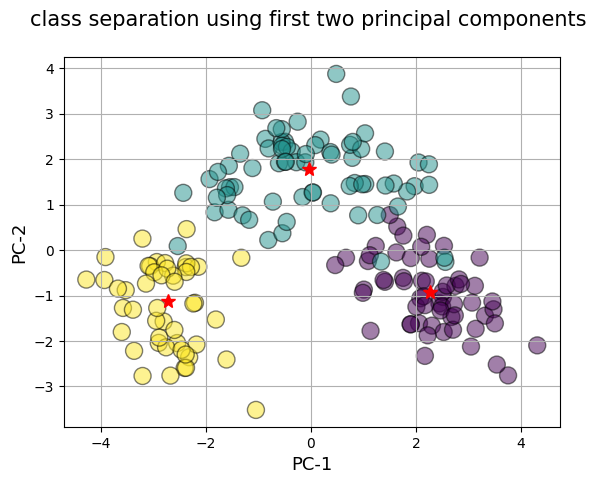

In [21]:
km = KMeans(
    n_clusters=3, init='random',
    n_init='warn', max_iter=100, 
    tol=1e-11, random_state=0
)
y_km = km.fit_predict(dataset_train)

centroids = km.cluster_centers_

plt.plot(centroids[:,1], centroids[:, 10], '*', markersize=10,c='red')
plt.scatter(dataset_train['Alcohol'],dataset_train['Color intensity'],c=dataset_train['class'],s=150,edgecolors='k',alpha=0.5)
plt.grid(True)
plt.title("scatter between two variables",fontsize=15)
plt.xlabel("Alcohol",fontsize=15)
plt.ylabel("Color intensity",fontsize=15)
plt.show()


k = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y = k.fit_predict(dfx_trans)

kcentroids = k.cluster_centers_


plt.plot(kcentroids[:,0], kcentroids[:, 1], '*', markersize=10,c='r')
plt.scatter(dfx_trans[0], dfx_trans[1], c=dataset_train['class'], edgecolors='k', alpha=0.5, s=150)
plt.grid(True)
plt.title("class separation using first two principal components \n",fontsize=15)
plt.xlabel("PC-1",fontsize=13)
plt.ylabel("PC-2",fontsize=13)
plt.show()

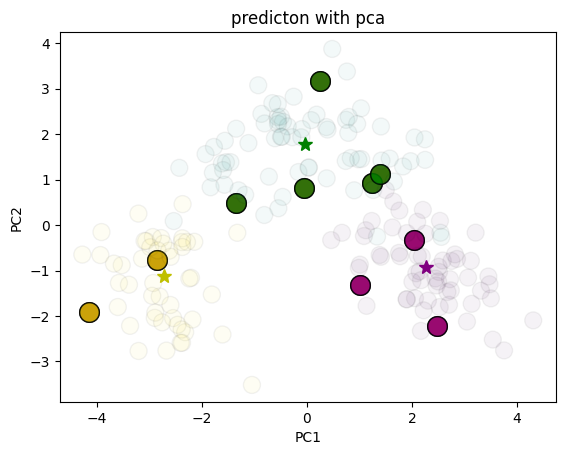

In [25]:
x=test.drop('class',axis=1)
y=test['class']
x=scaler.fit_transform(x)
tx=pd.DataFrame(data=x,columns=test.columns[1:])
test_trans=pca.transform(tx)
distances = k.transform(test_trans)
predictions = np.argmin(distances, axis=1)
plt.plot(kcentroids[0,0], kcentroids[0, 1], '*', markersize=10,c='g')
plt.plot(kcentroids[1,0], kcentroids[1, 1], '*', markersize=10,c='purple')
plt.plot(kcentroids[2,0], kcentroids[2, 1], '*', markersize=10,c='y')
plt.scatter(test_trans[:, 0], test_trans[:, 1]  ,s=200,c='r',edgecolors='k', alpha=0.8)
for i in range(0,len(predictions)):
    if predictions[i]==0:
        plt.scatter(test_trans[i, 0], test_trans[i, 1]  ,s=200,c='g',edgecolors='k', alpha=0.8)
    elif predictions[i]==1:
        plt.scatter(test_trans[i, 0], test_trans[i, 1]  ,s=200,c='purple',edgecolors='k', alpha=0.8)
    elif predictions[i]==2:
        plt.scatter(test_trans[i, 0], test_trans[i, 1]  ,s=200,c='y',edgecolors='k', alpha=0.8)
plt.scatter(dfx_trans[0], dfx_trans[1], c=dataset_train['class'], edgecolors='k', alpha=0.05, s=150)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('predicton with pca')
plt.show()

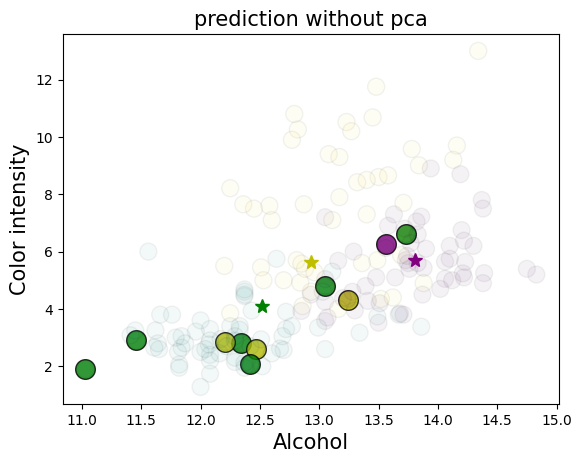

In [27]:
distances1 = km.transform(test)
predictions1 = np.argmin(distances1, axis=1)
plt.plot(centroids[0,1], centroids[0, 10], '*', markersize=10,c='purple')
plt.plot(centroids[1,1], centroids[1, 10], '*', markersize=10,c='y')
plt.plot(centroids[2,1], centroids[2, 10], '*', markersize=10,c='g')

for i in range(0,len(predictions1)):
    if predictions1[i]==0:
        plt.scatter(test.iloc[i, 1], test.iloc[i, 10]  ,s=200,c='purple',edgecolors='k', alpha=0.8)
    elif predictions1[i]==1:
        plt.scatter(test.iloc[i, 1], test.iloc[i, 10]  ,s=200,c='y',edgecolors='k', alpha=0.8)
    elif predictions1[i]==2:
        plt.scatter(test.iloc[i, 1], test.iloc[i, 10]  ,s=200,c='g',edgecolors='k', alpha=0.8)
plt.scatter(dataset_train['Alcohol'],dataset_train['Color intensity'],c=dataset_train['class'],s=150,edgecolors='k',alpha=0.05)
plt.title("prediction without pca",fontsize=15)
plt.xlabel("Alcohol",fontsize=15)
plt.ylabel("Color intensity",fontsize=15)
plt.show()
